# **Semantic Spotter - Project**

**Insurance domain RAG System**

The goal of the project is to build a robust generative search system capable of effectively and accurately answering questions from the loaded various insurance policy documents.

We are using LlamaIndex to build the generative search application.

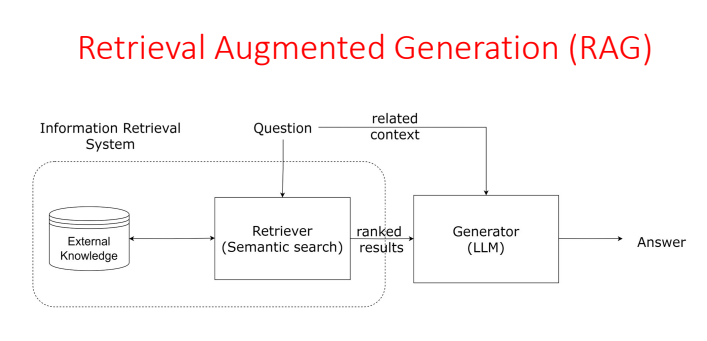

**Note:** Source data used in this project is collected from publicly available data sets from platforms like Kaggle and insurance documents from upGrad portal.


# **Let us build a RAG system in insurance domain**

**Step 1 :** Install and Import the necessary libraries

In [87]:
#Install pdfplumber
!pip install pdfplumber

In [88]:
#Load llamaindex
!pip install llama-index

In [89]:
#Loading docx2txt for document reading related dependencies
!pip install docx2txt

In [90]:
!pip install pypdf

In [91]:
!pip install openai

In [92]:
pip install -U llama-index-core llama-index-llms-openai llama-index-embeddings-openai

In [93]:
# Import all the required Libraries
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import pdfplumber
from pathlib import Path
import pandas as pd
from operator import itemgetter
import json
import tiktoken
import os
import openai
import ast

**Step 2 :** Mount your Google Drive and Set the API key

In [94]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
# Set the API key
with open("/content/drive/MyDrive/Gen_AI_Fashion_AI/API_Key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

**Step 3**- Setup for Data Loading/Reading

In [96]:
import nest_asyncio
nest_asyncio.apply()

In [97]:
os.chdir("/content/drive/MyDrive/Gen_AI_Fashion_AI/Documents")
!ls

Insurance_Policy_Documents  Principal-Sample-Life-Insurance-Policy.pdf	uber_2022.pdf
paul_graham_essay.txt	    uber_2021.pdf


# **Check 1:** Load the document HDFC-Life-Group-Term-Life-Policy.pdf and do a Q&R check

In [99]:
from pathlib import Path
from llama_index.core import download_loader
PDFReader = download_loader("PDFReader")
loader = PDFReader()
documents = loader.load_data(file=Path('/content/drive/MyDrive/Gen_AI_Fashion_AI/Documents/Insurance_Policy_Documents/HDFC-Life-Group-Term-Life-Policy.pdf'))

<ipython-input-99-37a2d3b32435>:3: DeprecationWarning: Call to deprecated function (or staticmethod) download_loader. (`download_loader()` is deprecated. Please install tool using pip install directly instead.)
  PDFReader = download_loader("PDFReader")


**Step 4:** Node Parsing and build the Vector Store Index and Summary Index

In [100]:
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core import VectorStoreIndex
from llama_index.core import SummaryIndex
from IPython.display import display, HTML

# create parser and parse document into nodes
parser = SimpleNodeParser.from_defaults()
nodes = parser.get_nodes_from_documents(documents)

# # build index
index = VectorStoreIndex(nodes)
summary_index = SummaryIndex(nodes)



**Step 5:** Query and Response Check with the above loaded document.

In [101]:
# Construct Query Engine
query_engine = index.as_query_engine()
query_engine1 = summary_index.as_query_engine()

# Query the engine.
response = query_engine.query("Who is the insurance provider")

# print the synthesized response.
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))

# Query the engine.
response = query_engine.query("what is the maximum premium to be paid for the people of age more than 60 years?")

# print the synthesized response.
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))

# Query the engine.
response = query_engine1.query("What is the Summary of the document")

# print the synthesized response.
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))

# **Check 2:** Load paul graham essay text document and do a Query Response Check

Data Loading and Q&R check

In [102]:
from llama_index.core import SimpleDirectoryReader
# Create a new document reader for a text file.
reader = SimpleDirectoryReader(input_files=["/content/drive/MyDrive/Gen_AI_Fashion_AI/Documents/paul_graham_essay.txt"])

# Load data from the new document.
documents = reader.load_data()

# Create new nodes from the new documents.
new_nodes = parser.get_nodes_from_documents(documents)

# Insert new nodes into the existing index.
index.insert_nodes(new_nodes)

# Reconstruct the query engine.
query_engine = index.as_query_engine()

# Query the engine with a new question.
response = query_engine.query("Why did Paul Graham start YC.")

# Print the synthesized response.
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))

# **Check 3:** Load the Sample Life Insurance Policy .pdf document, and do a Query Response Check

Data Loading

In [104]:
from pathlib import Path
from llama_index.core import download_loader
PDFReader = download_loader("PDFReader")
loader = PDFReader()
documents = loader.load_data(file=Path('/content/drive/MyDrive/Gen_AI_Fashion_AI/Documents/Principal-Sample-Life-Insurance-Policy.pdf'))

<ipython-input-104-ee9ac05bb399>:3: DeprecationWarning: Call to deprecated function (or staticmethod) download_loader. (`download_loader()` is deprecated. Please install tool using pip install directly instead.)
  PDFReader = download_loader("PDFReader")


Query Response Check with the above loaded Insurance document.

In [105]:
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core import VectorStoreIndex
from IPython.display import display, HTML

# create parser and parse document into nodes
parser = SimpleNodeParser.from_defaults()
nodes = parser.get_nodes_from_documents(documents)

# # build index
index = VectorStoreIndex(nodes)

# Construct Query Engine
query_engine = index.as_query_engine()

# Query the engine.
response = query_engine.query("In which section or Article, claim procedures are mentioned")

# print the synthesized response.
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))

# Query the engine.
response = query_engine.query("what is the Section C and Section D talks about in Part IV?")

# print the synthesized response.
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))

# Query the engine.
response = query_engine.query("who is the ODI captain of Mens Indian cricket team")

# print the synthesized response.
display(HTML(f'<p style="font-size:20px">{response.response}</p>'))

# **Check 4:** Load all the insurance PDF files and do a Query & Response check

**Step 1:** Data Loading

In [110]:
os.chdir("/content/drive/MyDrive/Gen_AI_Fashion_AI/Documents/Insurance_Policy_Documents")
!ls

 HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
 HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
 HDFC-Life-Group-Term-Life-Policy.pdf
'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf'
 HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf
 HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf
 HDFC-Surgicare-Plan-101N043V01.pdf


In [111]:
# Define the path where all pdf documents are present

pdf_path = "/content/drive/MyDrive/Gen_AI_Fashion_AI/Documents/Insurance_Policy_Documents"

In [112]:
from llama_index.core import SimpleDirectoryReader
reader = SimpleDirectoryReader(input_dir= pdf_path)

In [113]:
?SimpleDirectoryReader

In [114]:
documents = reader.load_data()
print(f"Loaded {len(documents)} docs")

Loaded 217 docs


In [115]:
!pip install python-pptx torch transformers python-pptx Pillow -q

In [116]:
documents

[Document(id_='33da463d-4de8-4182-b596-a2b09486cbd2', embedding=None, metadata={'page_label': '1', 'file_name': 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_path': '/content/drive/MyDrive/Gen_AI_Fashion_AI/Documents/Insurance_Policy_Documents/HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_type': 'application/pdf', 'file_size': 1303156, 'creation_date': '2024-08-27', 'last_modified_date': '2024-08-25'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n             Part A \n<<Date>> \n<<Policyholder’s Name>>  \n<<Policyholder’s Address>> \n<<Policyholder’s Contact Number>>  \n \nDear <<Policyholder’s Name>>,  \n \nSub: Your Policy no. <<  >> \nWe are glad to inform you that your proposal has been accepted and 

In [117]:
documents[3]

Document(id_='8fa8899c-34e9-460a-8edb-f6ba5f02df1f', embedding=None, metadata={'page_label': '4', 'file_name': 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_path': '/content/drive/MyDrive/Gen_AI_Fashion_AI/Documents/Insurance_Policy_Documents/HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_type': 'application/pdf', 'file_size': 1303156, 'creation_date': '2024-08-27', 'last_modified_date': '2024-08-25'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n Date of Birth of Appointee << dd/mm/yyyy >>     \nAppointee\'s Address <<  >>      \n \nSigned at Mumbai on <<>>  \nFor HDFC Life Insurance Company Limited \nAuthorised Signatory \nNote: Kindly note that name of the Company has changed from "HDFC Standard Life I

**Step 2:** Building the query engine

In [118]:
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core import VectorStoreIndex
from IPython.display import display, HTML

# create parser and parse document into nodes
parser = SimpleNodeParser.from_defaults()
nodes = parser.get_nodes_from_documents(documents)
# documents --> nodes

# # build index
index = VectorStoreIndex(documents)
#nodes --> index

# Construct Query Engine
query_engine = index.as_query_engine()

In [119]:
parser

SentenceSplitter(include_metadata=True, include_prev_next_rel=True, callback_manager=<llama_index.core.callbacks.base.CallbackManager object at 0x7c6a8da21030>, id_func=<function default_id_func at 0x7c6aa4d19fc0>, chunk_size=1024, chunk_overlap=200, separator=' ', paragraph_separator='\n\n\n', secondary_chunking_regex='[^,.;。？！]+[,.;。？！]?')

**Step 3** Checking respones and respone parameters



In [120]:
response = query_engine.query("What is this document talking about?")

In [121]:
#Checking the response
response.response

'This document is discussing an insurance policy called HDFC Life Sampoorna Jeevan.'

In [122]:
response = query_engine.query("What are all names of the documents available and how many?")

In [123]:
#Checking the response
response.response

'The names of the documents available are:\n1. HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf'

In [124]:
#Check the source node
response.source_nodes

[NodeWithScore(node=Document(id_='0cd4dcae-2eb7-4e77-bccd-5f2d04c6c19e', embedding=None, metadata={'page_label': '44', 'file_name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_path': '/content/drive/MyDrive/Gen_AI_Fashion_AI/Documents/Insurance_Policy_Documents/HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_type': 'application/pdf', 'file_size': 1990500, 'creation_date': '2024-08-27', 'last_modified_date': '2024-08-25'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n  \n \n', mimetype='text/plain', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'), score=0.7819553224023754),
 NodeWithScore(node=Document(id

In [125]:
#Extract the file name
response.source_nodes[0].node.metadata['file_name']

'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf'

In [126]:
#Extract the score
response.source_nodes[1].score

0.780342432193575

**Step 4** Creating a response Pipeline

User receives the response and the document that they can refer to

In [127]:
## Query response function
def query_response(user_input):
  response = query_engine.query(user_input)
  file_name = response.source_nodes[0].node.metadata['file_name']
  final_response = response.response + '\n Check further at ' + file_name + ' document'
  return final_response

In [128]:
def initialize_conv():
  print('Feel free to ask Questions regarding insurance policy. Press exit once you are done')
  while True:
    user_input = input()
    if user_input.lower() == 'exit':
      print('Exiting the program... bye')
      break
    else:
      response = query_response(user_input)
      display(HTML(f'<p style="font-size:20px">{response}</p>'))

In [129]:
initialize_conv()

Feel free to ask Questions regarding insurance policy. Press exit once you are done
What is the Policy name?


How much premium to be paid?


What is the Policy document name?


What is the Policy name?


What is the maturity amount?


Maturity benefits?


exit
Exiting the program... bye


**Step 5** - Build a Testing Pipeline

Here we feed a series of questions to the Q/A bot and store the responses along with the feedback on whether it's accurate or not from the user

In [130]:
questions = ['What is the Policy document name?', "What is the policy name?","What is the maturity amount?",
             'Any maturity benefits?']

In [131]:
def testing_pipeline(questions):
  test_feedback  = []
  for i in questions:
    print(i)
    print(query_response(i))
    print('\n Please provide your feedback on the response provided by the bot')
    user_input = input()
    test_feedback.append((i,query_response(i),user_input))
  feedback_df = pd.DataFrame(test_feedback, columns =['Question', 'Response', 'Good or Bad'])
  return feedback_df

In [132]:
import pandas as pd

In [133]:
testing_pipeline(questions)

What is the Policy document name?
The policy document name is "HDFC Life Sampoorna Jeevan."
 Check further at HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf document

 Please provide your feedback on the response provided by the bot
Good
What is the policy name?
HDFC Life Group Poorna Suraksha
 Check further at HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf document

 Please provide your feedback on the response provided by the bot
Bad
What is the maturity amount?
The maturity amount is the Guaranteed Income on Maturity payable at the end of each Income Payout Frequency as provided under the Policy Schedule, starting from the (Policy Term + 1)th year until the individual attains age 99 years. Additionally, on the Maturity Date, there is an option to receive the Guaranteed Sum Assured on Maturity, which is the present value of future payouts discounted at a rate of 9% p.a.
 Check further at HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-D

,Question,Response,Good or Bad
0,What is the Policy document name?,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,Good
1,What is the policy name?,HDFC Life Group Poorna Suraksha\n Check furthe...,Bad
2,What is the maturity amount?,The maturity amount is the Guaranteed Income o...,Good
3,Any maturity benefits?,The Maturity Benefit includes Guaranteed Incom...,Good


# **Next Steps/ Overall Recommendations**

Based on the testing pipeline's feedback develop a strategy on how to improve the POC further.

Think of implementing some more use cases and user stories.

As of now, for the given Insurance documents, the Responses are good enough for the user input queries.